# git history

git log --pretty=format:%ai,%h,%an,%ae,%s > out

In [1]:
def load_git_history(filename):
    d = pd.read_csv(filename)
    d.columns = ['date' , 'commit', 'author', 'email', 'message']
    d['date'] = pd.to_datetime(d['date'])
    d['filename'] = filename
    #  needed as different time zones
    d.loc[:, 'local-year'] = d['date'].apply(lambda x: x.year)
    d.loc[:, 'local-month'] = d['date'].apply(lambda x: x.month)
    d.loc[:, 'local-day'] = d['date'].apply(lambda x: x.day)
    d.loc[:, 'local-hour'] = d['date'].apply(lambda x: x.hour)
    d.loc[:, 'local-day-of-week'] = d['date'].apply(lambda x: x.weekday())
    return d

wm = load_git_history('world-models-commits.csv')

wm.head()

,date,commit,author,email,message,filename,local-year,local-month,local-day,local-hour,local-day-of-week
0,2020-01-14 22:19:57+01:00,6b47ab5,Adam Green,adam.green@adgefficiency.com,blog post,world-models-commits.csv,2020,1,14,22,1
1,2020-01-10 16:18:53+01:00,ead772e,Adam Green,adam.green@adgefficiency.com,blog post,world-models-commits.csv,2020,1,10,16,4
2,2020-01-08 07:28:53+01:00,5867b93,Adam Green,adam.green@adgefficiency.com,vae draft blog post done,world-models-commits.csv,2020,1,8,7,2
3,2019-12-27 05:03:56+01:00,181a7e1,Adam Green,adam.green@adgefficiency.com,s,world-models-commits.csv,2019,12,27,5,4
4,2019-12-24 05:31:51+01:00,f570210,Adam Green,adam.green@adgefficiency.com,sync,world-models-commits.csv,2019,12,24,5,1


In [2]:
mono = load_git_history('all-mono-commits.csv')
mono.head()

,date,commit,author,email,message,filename,local-year,local-month,local-day,local-hour,local-day-of-week
0,2019-11-17 10:32:23+01:00,0bd05f2,Adam Green,adam.green@adgefficiency.com,dsr,all-mono-commits.csv,2019,11,17,10,6
1,2019-10-09 21:56:58+02:00,cf43aea,Adam Green,adam.green@adgefficiency.com,dsr,all-mono-commits.csv,2019,10,9,21,2
2,2019-09-29 00:15:02+02:00,f5fb7f7,Adam Green,adam.green@adgefficiency.com,sync,all-mono-commits.csv,2019,9,29,0,6
3,2019-08-08 02:43:34+02:00,482e1f0,Adam Green,adam.green@adgefficiency.com,dsr,all-mono-commits.csv,2019,8,8,2,3
4,2019-08-08 02:43:10+02:00,5f58d0d,Adam Green,adam.green@adgefficiency.com,wm refactor,all-mono-commits.csv,2019,8,8,2,3


In [3]:
mask = mono['message'].str.contains('wm').astype(int) + mono['message'].str.contains('world models').astype(int) 
print(sum(mask))

mask = mask.astype(bool)

47


In [4]:
mono_wm = mono.loc[mask, :]

In [5]:
mono_wm.to_csv('mono-commits.csv')

In [6]:
commits = pd.concat([wm, mono_wm], axis=0)

daily = commits.groupby([commits['local-year'], commits['local-month'], commits['local-day']]).count()
daily.head()

date  commit  author  email  message  filename  local-hour  local-day-of-week
local-year local-month local-day                                                                               
2019       4           11            1       1       1      1        1         1           1                  1
                       12            1       1       1      1        1         1           1                  1
                       23            1       1       1      1        1         1           1                  1
           5           2             1       1       1      1        1         1           1                  1
                       5             1       1       1      1        1         1           1                  1

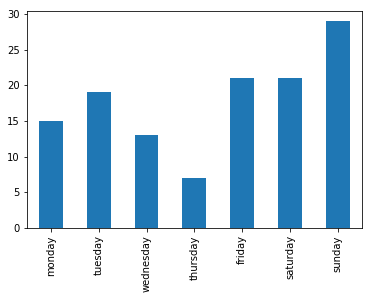

In [7]:
dayofweek = commits.groupby([commits['local-day-of-week']]).count()
dayofweek.index = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']
dayofweek.loc[:, 'date'].plot(kind='bar')

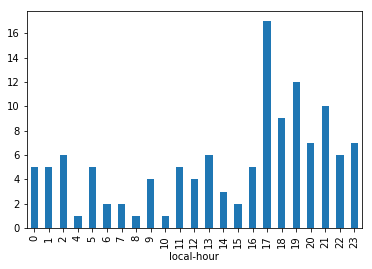

In [8]:
hour = commits.groupby([commits['local-hour']]).count()
hour.loc[:, 'date'].plot(kind='bar')

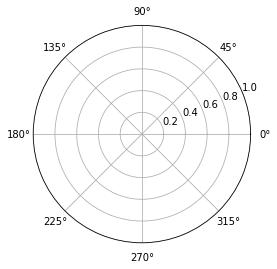

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

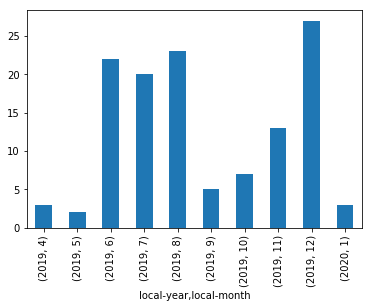

In [14]:
dayofweek = commits.groupby([commits['local-year'], commits['local-month']]).count()
f, a = plt.subplots()
dayofweek.loc[:, 'date'].plot(kind='bar', ax=a)
f.savefig('commits-month.png')

In [10]:
min(commits['date'])

datetime.datetime(2019, 4, 11, 22, 58, 59, tzinfo=tzoffset(None, 43200))

In [11]:
set(commits['filename'])

{'all-mono-commits.csv', 'world-models-commits.csv'}